In [5]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_id = '1_onAdWevlzZrg9ILSPcxX5HaJCbN2i-9'
output_filename = 'zoo_data.csv'

gdown.download(id=file_id, output=output_filename, quiet=False)
df = pd.read_csv(output_filename, header=None)

column_names = [
    "animal_name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type"
]

df.columns = column_names
df.to_csv(output_filename, index=False)
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1_onAdWevlzZrg9ILSPcxX5HaJCbN2i-9
To: /content/zoo_data.csv
100%|██████████| 4.13k/4.13k [00:00<00:00, 3.05MB/s]

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [3]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows after dropping: 0


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


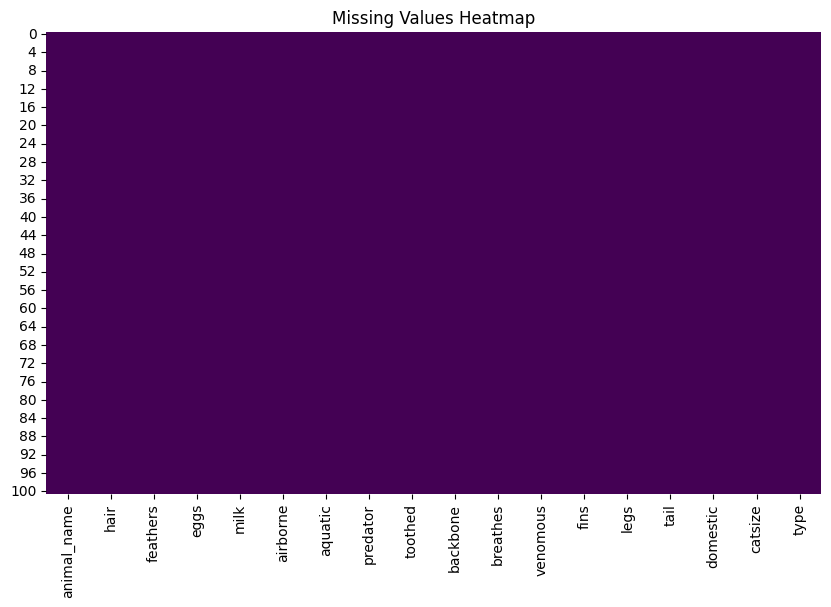

In [6]:
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['Month', 'Year', 'Loud Cover']]

categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features = [col for col in categorical_features if col not in ['Formatted Date', 'Daily Summary']]


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

data_preprocessed = pipeline.fit_transform(df)

print("\nShape of preprocessed data:")
print(data_preprocessed.shape)


Shape of preprocessed data:
(101, 117)


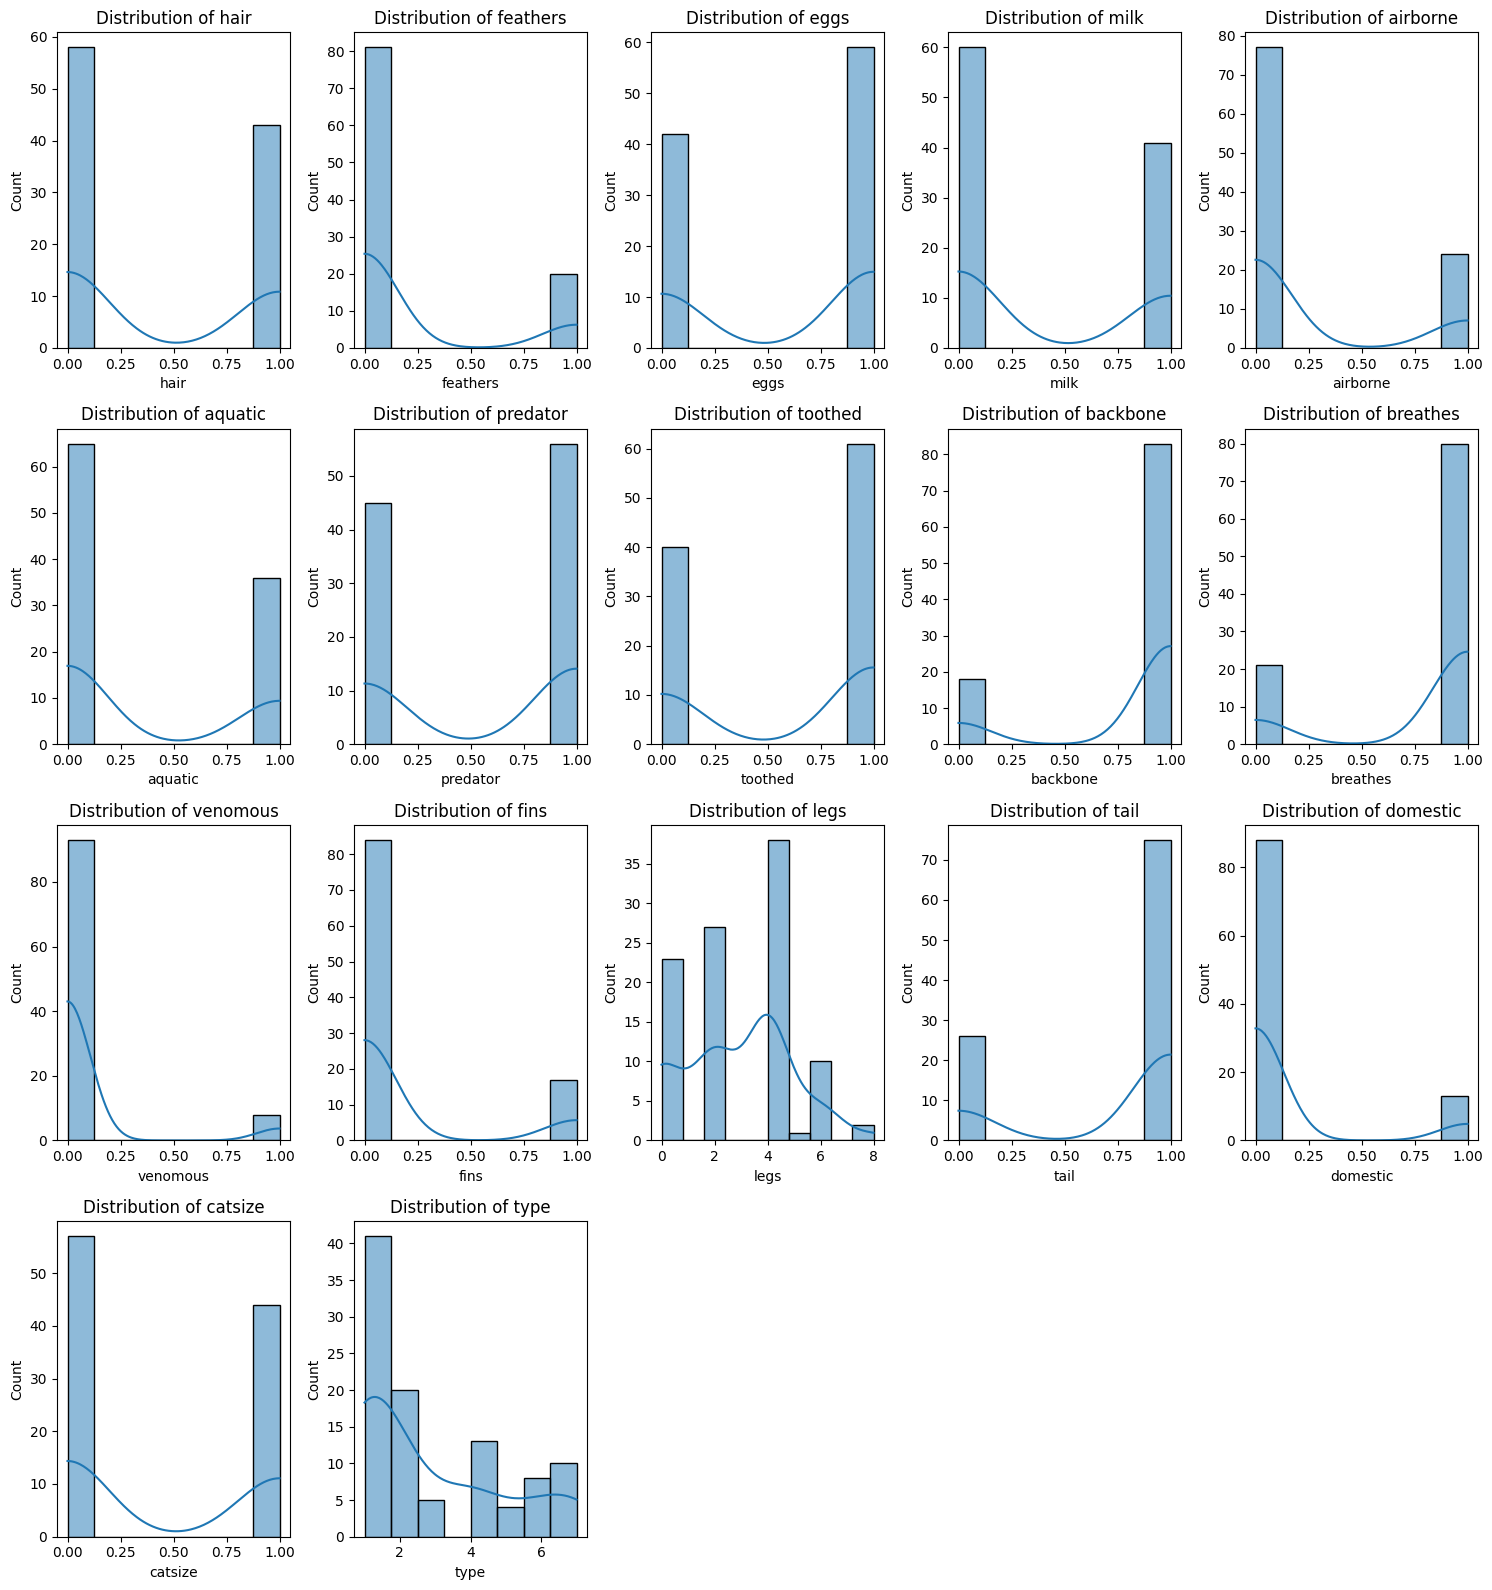

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_features = len(numerical_features)
num_cols = 5
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()